In [1]:
import pandas as pd
import matplotlib.pyplot as plt

$ \rho(a,b) = \frac{a*b}{\Sigma{a_i + b_i}} $

In [6]:
#data.hist(bins=6)

In [40]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("/home/annerer/Downloads/LSA-2018-00278_TableS4.txt",sep ="\t")
data.index = data['GENE']
data = data.drop('GENE',axis=1)
data.head()

,A549_LUNG,CFPAC1_PANCREAS,CHP212_AUTONOMIC_GANGLIA,DANG_PANCREAS,KELLY_AUTONOMIC_GANGLIA,KP2_PANCREAS,KP3_PANCREAS,KP4_PANCREAS,MIAPACA2_PANCREAS,NCIH1437_LUNG,...,U118MG_CENTRAL_NERVOUS_SYSTEM,U2OS_BONE,U343_CENTRAL_NERVOUS_SYSTEM,UACC62_SKIN,UMUC3_URINARY_TRACT,VMCUB1_URINARY_TRACT,WM1799_SKIN,WM2664_SKIN,WM983B_SKIN,YKG1_CENTRAL_NERVOUS_SYSTEM
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,-17.423,-20.647,-28.836,-31.016,-23.540,-25.811,-20.112,-26.493,-17.036,-32.133,...,-24.170,-21.383,-21.286,-30.931,-19.365,-19.633,-23.385,-27.848,-25.707,-27.240
A1CF,-26.567,-24.943,-20.669,-21.384,-27.974,-26.414,-21.594,-24.928,-30.427,-29.575,...,-26.696,-32.540,-24.116,-19.508,-26.645,-23.723,-29.146,-24.351,-28.355,-21.766
A2M,-17.068,-17.543,-24.666,-23.093,-16.209,-17.681,-20.955,-22.149,-18.750,-23.469,...,-14.144,-19.946,-24.095,-23.617,-15.625,-29.019,-6.685,-18.773,-20.462,-27.258
A2ML1,-24.133,-19.848,-26.523,-26.768,-24.029,-19.660,-28.300,-22.529,-28.063,-29.718,...,-21.733,-20.757,-34.984,-27.236,-21.984,-29.512,-29.738,-32.566,-27.427,-33.146
A3GALT2,-22.312,-25.476,-20.064,-19.207,-12.995,-16.646,-14.701,-25.260,-17.514,-34.984,...,-12.568,-20.820,-15.986,-20.420,-12.393,-23.462,-16.776,-21.269,-16.888,-8.540


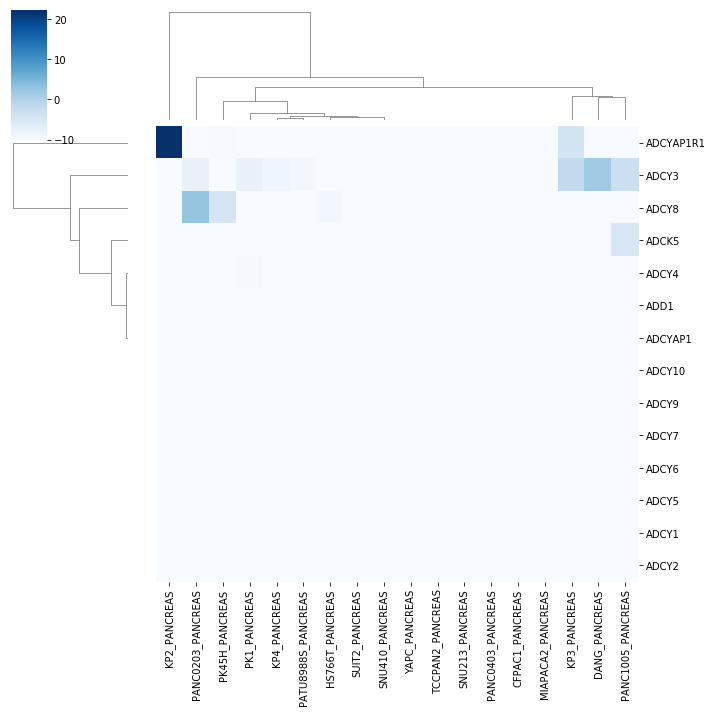

In [18]:
pancreas = data.filter(like="PANCREAS",axis=1)[290:304]

pancreas = pancreas.clip(-10,30)
pancreas_plot = sns.clustermap(pancreas,yticklabels=data['GENE'][290:304],cmap="Blues")


#figure = pancreas_plot.get_figure()    
#figure.savefig('pancreas_plot.png', dpi=800)

how would you do model comparision here? in principle you could use other knockout datasets, with shRNA and RNAi, especially for the same cell lines. 

What would you like to draw from the network and what would be a 
sensible model? these are net count data after all, but highly processed essentiality data.

#### Q: looking at clusters?
we could build a sparse matrix using a cutoff at around -5 (like 
kim et al 2019 did - at least when plotting).
for this matrix, we could look at the highest values.

q: what genes exactly were left out in their analysis.
how were the data generated precisely? (how many knocked down genes, which ones?)


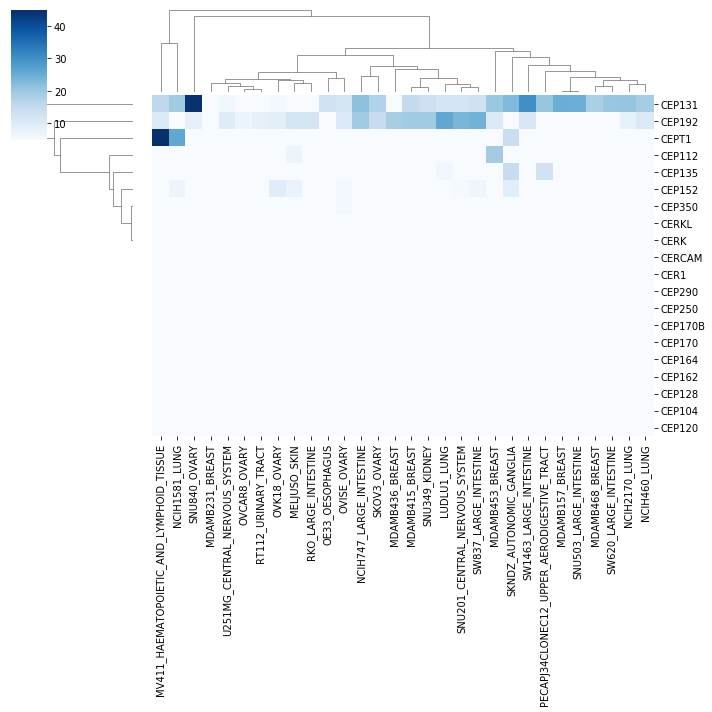

In [9]:

#setup for looking at the essentiality data
# specifiy which columns to include and plot the genes and their respective names alongside them

import seaborn as sns

pan = data.drop(data.columns[0],axis=1)
pan = pan[pan.columns[100:130]]
pan = pan[2705:2725]


pan = pan.clip(5,100)
sns.clustermap(pan,yticklabels=data['GENE'][2705:2725],cmap="Blues")


q: what is the uncertainty associated with the BAGEL bayes factors?
q: how to best cluster a (sparse) matrix? 
q: how to systematically identify relevant genes and relevant cell lines?
q: in case you are not validating a putative network with these data, where 

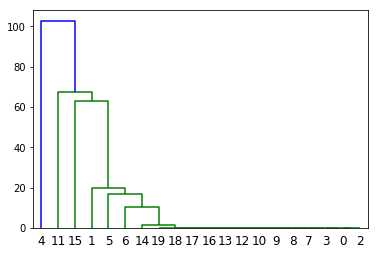

In [123]:
# finding clusters within the essentiality data

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pan, method  = "ward"))



In [ ]:
dendrogram = sch.dendrogram(sch.linkage(pan, method  = "ward"))

In [2]:
#import sknetwork as skn

#adjaceny = pan
#paris = Paris(engine='python')
#paris.fit(adjaceny).dendrogram_

In [3]:
#pan.max(axis=1)

In [1]:
#pan.idxmax(axis=0)

In [2]:
#pan.max(axis=0)

biology: ankle2 is essential in many cell lines.
Ankyrin repeat and LEM domain-containing protein 2

cep131 centrosomal protein
cep192 
Cep192 is a major regulator of pericentriolar material recruitment, centrosome maturation, and centriole duplication in mammalian cells.




In [64]:
pan = data.drop(data.columns[0],axis=1)
pan = pan[pan.columns[1:10]]

pan = pan[1:10]
pan.shape

(9, 9)

In [40]:
pan = data.drop(data.columns[0],axis=1)
pan = pan[1:10]

pan

,A549_LUNG,CFPAC1_PANCREAS,CHP212_AUTONOMIC_GANGLIA,DANG_PANCREAS,KELLY_AUTONOMIC_GANGLIA,KP2_PANCREAS,KP3_PANCREAS,KP4_PANCREAS,MIAPACA2_PANCREAS,NCIH1437_LUNG,...,U118MG_CENTRAL_NERVOUS_SYSTEM,U2OS_BONE,U343_CENTRAL_NERVOUS_SYSTEM,UACC62_SKIN,UMUC3_URINARY_TRACT,VMCUB1_URINARY_TRACT,WM1799_SKIN,WM2664_SKIN,WM983B_SKIN,YKG1_CENTRAL_NERVOUS_SYSTEM
1,-26.567,-24.943,-20.669,-21.384,-27.974,-26.414,-21.594,-24.928,-30.427,-29.575,...,-26.696,-32.540,-24.116,-19.508,-26.645,-23.723,-29.146,-24.351,-28.355,-21.766
2,-17.068,-17.543,-24.666,-23.093,-16.209,-17.681,-20.955,-22.149,-18.750,-23.469,...,-14.144,-19.946,-24.095,-23.617,-15.625,-29.019,-6.685,-18.773,-20.462,-27.258
3,-24.133,-19.848,-26.523,-26.768,-24.029,-19.660,-28.300,-22.529,-28.063,-29.718,...,-21.733,-20.757,-34.984,-27.236,-21.984,-29.512,-29.738,-32.566,-27.427,-33.146
4,-22.312,-25.476,-20.064,-19.207,-12.995,-16.646,-14.701,-25.260,-17.514,-34.984,...,-12.568,-20.820,-15.986,-20.420,-12.393,-23.462,-16.776,-21.269,-16.888,-8.540
5,-23.518,-27.136,-14.847,-20.795,-18.067,-16.377,-19.297,-19.291,-18.358,-15.947,...,-29.261,-21.900,-25.013,-13.806,-31.395,-22.791,-22.867,-11.055,-15.256,-15.254
6,-31.093,-20.726,-27.709,-18.835,-21.838,-25.128,-17.669,-26.814,-24.737,-25.528,...,-20.973,-31.183,-32.400,-19.459,-24.563,-18.454,-20.383,-29.518,-26.884,-14.971
7,5.975,5.810,12.795,-2.753,-7.567,14.847,6.383,-0.849,-2.730,-7.796,...,-4.649,1.442,7.170,2.319,-8.430,6.119,-8.941,-10.210,-1.158,-3.873
8,-26.805,-26.374,-24.565,-35.498,-20.692,-25.545,-27.467,-29.942,-27.033,-31.732,...,-34.356,-22.280,-22.081,-26.792,-20.487,-32.144,-28.787,-26.664,-20.348,-21.289
9,-24.711,-26.468,-27.746,-22.175,-33.659,-24.688,-16.105,-29.211,-24.030,-30.071,...,-30.651,-27.119,-20.505,-34.044,-25.104,-30.000,-27.337,-31.856,-21.783,-16.258


In [119]:
#data.columns[100:200]

In [131]:
#data.filter(like='PEX', axis=0)

In [110]:
#data[["PANC0813","PATU8902","SU8686","BXPC3","PANC0327","PANC1"]][10792:10800]

In [202]:
#subset3 = data["GENE"][200:305]
#subset3

In [7]:
subset = data[['PANC1005_PANCREAS', 'PATU8988S_PANCREAS',
       'PF382_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'PK1_PANCREAS',
       'PLCPRF5_LIVER', 'RD_SOFT_TISSUE','MDAMB231_BREAST', 'MDAMB415_BREAST', 'MDAMB436_BREAST',
       'MDAMB453_BREAST']][10790:10800]

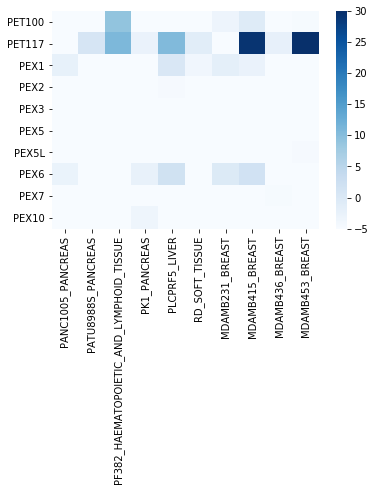

In [8]:
import seaborn as sns

subset = subset.clip(-5,30)
sns.heatmap(subset,yticklabels=data['GENE'][10790:10800],cmap="Blues")


In [170]:
subset = data[[ 'NCIH1581_LUNG',
       'NCIH2170_LUNG', 'NCIH460_LUNG', 'NCIH747_LARGE_INTESTINE',]][10792:10800]

subset.filter(like='LAR',axis=1)


,NCIH747_LARGE_INTESTINE
10792,8.819
10793,-21.639
10794,-21.046
10795,-11.361
10796,-13.819
10797,-13.394
10798,-13.604
10799,-15.234


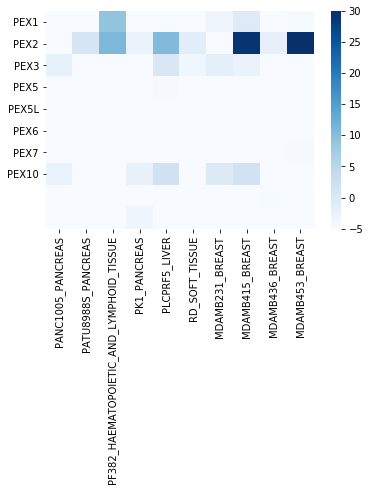

In [209]:
import seaborn as sns

# sns.heatmap(df, xticklabels=xlabels, yticklabels=ylabels)
subset = subset.clip(-5,50)
sns.heatmap(subset,yticklabels=data['GENE'][10792:10800],cmap="Blues")

# df.filter(like='bbi', axis=0)

#data['GENE'][10792:10800]

having clustered the whole dataset, see if you find good correspondence between the hart graphs (might want to use cytoscape) and take a more detailed look at mutual exclusions in network clusters.

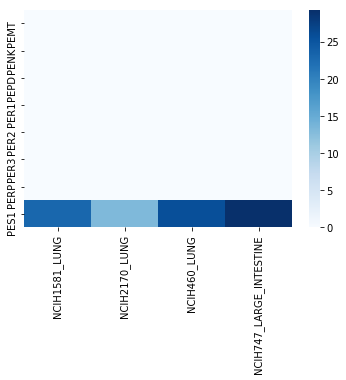

In [210]:
subset2 = data[[ 'NCIH1581_LUNG',
       'NCIH2170_LUNG', 'NCIH460_LUNG', 'NCIH747_LARGE_INTESTINE',]][10782:10790]
subset2 = subset2.clip(0,50)
sns.heatmap(subset2,yticklabels=data['GENE'][10782:10790],cmap="Blues")
